In [2]:
#Scraping Youtube Channles and doing Sentiment Analysis

# Text Classification

In [3]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import nltk
%matplotlib inline

In [5]:
URL="https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v"
r=requests.get(URL)
print(len(r.text))


340040


In [8]:
s=BeautifulSoup(r.text)
print(s.title.string)

Machine Learning with Python - YouTube


Scrape the parent page of playlists.
Since every youtube link has a watch 
substring contained in it and also index 
substring to avoid duplication. Use this 
information and extract all those links
from this parent page.


In [13]:
parent="https://youtube.com"
child_videos=[]
title=[]
for link in s.find_all('a'):
    child=link.get('href')
    l=link.text.strip()
    try:
        if("watch" in child) and ("index" in child):
            child_videos.append(parent +child)
            title.append(l)
    except:
        pass
            

In [18]:
len(title)

144

In [19]:
## Clean the title:
while True:
    if "" in title:
        title.remove("")
    elif "Play all" in title:
        title.remove("Play all")
        title.remove("► Play all")
    else:
        break
len(title)

72

In [20]:
type(child_videos)

list

In [ ]:
child_videos=list(set(child_videos))


In [23]:
child_videos=list(set(child_videos))

for i in child_videos:
    x=re.findall(r'.*index=(\d\d?).*', i)
    #print(x)
child_videos=sorted(child_videos,key=lambda x:int(re.findall(r'.*index=(\d\d?).*', x)[0]) if len(re.findall(r'.*index=(\d\d?).*', x)) > 0 else 0)

In [24]:
child_videos

['https://youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=2&t=0s',
 'https://youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=3&t=0s',
 'https://youtube.com/watch?v=lN5jesocJjk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=4&t=0s',
 'https://youtube.com/watch?v=r4mwkS2T9aI&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=5&t=0s',
 'https://youtube.com/watch?v=QLVMqwpOLPk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=6&t=0s',
 'https://youtube.com/watch?v=za5s7RB_VLw&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=7&t=0s',
 'https://youtube.com/watch?v=V59bYfIomVk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=8&t=0s',
 'https://youtube.com/watch?v=SvmueyhSkgQ&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=9&t=0s',
 'https://youtube.com/watch?v=KLGfMGsgP34&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=10&t=0s',
 'https://youtube.com/watch?v=-fgYp74SNtk&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=11&t=0s',
 'https://youtube.com/watch?

In [25]:
# ## Scrape individual links obtained in list of child videos
# and extract likes and dislikes.

In [31]:
youtube_data=[]
for j in range(0,len(child_videos)):
    dislikes=0
    likes=0
    ri=requests.get(child_videos[j])
    si=BeautifulSoup(ri.text)
    for i in si.find_all('button'):
        m=i.get('aria-label')
        try:
            if(isinstance(m,str)):
                if('dislike' in m):
                    dislikes=re.findall(r'\d*,?\d+?',m)
                elif ('like' in m):
                    likes=re.findall(r'\d*,?\d+?',m)
        except:
            pass
    youtube_data.append([child_videos[j],title[j],likes,dislikes])
    
    

In [27]:
# ## Create a dataframe from list of youtube data
# and get the likes and dilikes

In [48]:
test = pd.DataFrame(youtube_data, columns = ['Link', 'Title', 'Likes', 'Dislikes'])

In [49]:
test.head(3)

,Link,Title,Likes,Dislikes
0,https://youtube.com/watch?v=OGxgnH8y2NM&list=P...,Practical Machine Learning Tutorial with Pytho...,"[14,6, 14]",[197]
1,https://youtube.com/watch?v=JcI5Vnw0b2c&list=P...,Regression Intro - Practical Machine Learning ...,"[6,3, 14]",[136]
2,https://youtube.com/watch?v=lN5jesocJjk&list=P...,Regression Features and Labels - Practical Mac...,"[2,8, 90]",[115]


In [50]:
youtube_data[:2]

[['https://youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=2&t=0s',
  'Practical Machine Learning Tutorial with Python Intro p.1',
  ['14,6', '14'],
  ['197']],
 ['https://youtube.com/watch?v=JcI5Vnw0b2c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=3&t=0s',
  'Regression Intro - Practical Machine Learning Tutorial with Python p.2',
  ['6,3', '14'],
  ['136']]]

In [46]:
## As there were , and spaces in likes and dislikes so extract numbers

In [72]:
test.Likes.new=[]
for i in test.Likes:
    #print(i)
    try:
        test.Likes.new.append(''.join(i))
    except:
        test.Likes.new.append('0')
        
# test.Likes = test.Likes.apply(lambda x: ''.join(x))
# test.Dislikes = test.Dislikes.apply(lambda x: ''.join(x))

In [73]:
len(test.Likes)

72

In [74]:
len(test.Likes.new)

72

In [68]:
# test.Likes=test.Likes.apply(lambda x: int(re.sub(',','',x)))
# test.Dislikes=test.Dislikes.apply(lambda x:int(re.sub(',','',x)))

In [75]:
test.Likes.new1=[]
for i in test.Likes.new:
    #print(i)
    try:
        test.Likes.new1.append(int(re.sub(',', '', i)))
    except:
        test.Likes.new1.append('0')
        
# test.Likes = test.Likes.apply(lambda x: ''.join(x))
# test.Dislikes = test.Dislikes.apply(lambda x: ''.join(x))

In [76]:
len(test.Likes.new1)

72

In [77]:
test.Likes.new1[:2]

[14614, 6314]

In [79]:
test.Likes=test.Likes.new1

In [80]:
test.head()

,Link,Title,Likes,Dislikes
0,https://youtube.com/watch?v=OGxgnH8y2NM&list=P...,Practical Machine Learning Tutorial with Pytho...,14614,[197]
1,https://youtube.com/watch?v=JcI5Vnw0b2c&list=P...,Regression Intro - Practical Machine Learning ...,6314,[136]
2,https://youtube.com/watch?v=lN5jesocJjk&list=P...,Regression Features and Labels - Practical Mac...,2890,[115]
3,https://youtube.com/watch?v=r4mwkS2T9aI&list=P...,Regression Training and Testing - Practical Ma...,2189,[78]
4,https://youtube.com/watch?v=QLVMqwpOLPk&list=P...,Regression forecasting and predicting - Practi...,1413,[86]


In [82]:
test.Dislikes.new=[]
for i in test.Dislikes:
    #print(i)
    try:
        test.Dislikes.new.append(''.join(i))
    except:
        test.Dislikes.new.append('0')
        
# test.Likes = test.Likes.apply(lambda x: ''.join(x))
# test.Dislikes = test.Dislikes.apply(lambda x: ''.join(x))

In [83]:
test.Dislikes.new[:2]

['197', '136']

In [84]:
test.Dislikes.new1=[]
for i in test.Dislikes.new:
    #print(i)
    try:
        test.Dislikes.new1.append(int(re.sub(',', '', i)))
    except:
        test.Dislikes.new1.append('0')
        
# test.Likes = test.Likes.apply(lambda x: ''.join(x))
# test.Dislikes = test.Dislikes.apply(lambda x: ''.join(x))

In [85]:
test.Dislikes=test.Dislikes.new1

In [88]:
test.head()

,Link,Title,Likes,Dislikes,LDRatio
0,https://youtube.com/watch?v=OGxgnH8y2NM&list=P...,Practical Machine Learning Tutorial with Pytho...,14614,197,74.182741
1,https://youtube.com/watch?v=JcI5Vnw0b2c&list=P...,Regression Intro - Practical Machine Learning ...,6314,136,46.426471
2,https://youtube.com/watch?v=lN5jesocJjk&list=P...,Regression Features and Labels - Practical Mac...,2890,115,25.130435
3,https://youtube.com/watch?v=r4mwkS2T9aI&list=P...,Regression Training and Testing - Practical Ma...,2189,78,28.064103
4,https://youtube.com/watch?v=QLVMqwpOLPk&list=P...,Regression forecasting and predicting - Practi...,1413,86,16.430233


In [87]:
test['LDRatio'] = test.Likes/test.Dislikes

In [89]:
q2 = test.describe().iloc[5,2]
q2

46.06666666666667

In [90]:
x = []
for i in test.LDRatio:
    if i > q2:
        x.append(1)
    else:
        x.append(0)
test['Target'] = x

In [91]:
test.head()

,Link,Title,Likes,Dislikes,LDRatio,Target
0,https://youtube.com/watch?v=OGxgnH8y2NM&list=P...,Practical Machine Learning Tutorial with Pytho...,14614,197,74.182741,1
1,https://youtube.com/watch?v=JcI5Vnw0b2c&list=P...,Regression Intro - Practical Machine Learning ...,6314,136,46.426471,1
2,https://youtube.com/watch?v=lN5jesocJjk&list=P...,Regression Features and Labels - Practical Mac...,2890,115,25.130435,0
3,https://youtube.com/watch?v=r4mwkS2T9aI&list=P...,Regression Training and Testing - Practical Ma...,2189,78,28.064103,0
4,https://youtube.com/watch?v=QLVMqwpOLPk&list=P...,Regression forecasting and predicting - Practi...,1413,86,16.430233,0


# Bag of Words

In [92]:
from nltk.tokenize import word_tokenize
text=list(test.Title.str.lower())
docs=[]
for i in text:
    docs.append(word_tokenize(i))

In [93]:
docs[:2]

[['practical',
  'machine',
  'learning',
  'tutorial',
  'with',
  'python',
  'intro',
  'p.1'],
 ['regression',
  'intro',
  '-',
  'practical',
  'machine',
  'learning',
  'tutorial',
  'with',
  'python',
  'p.2']]

In [94]:
text[:2]

['practical machine learning tutorial with python intro p.1',
 'regression intro - practical machine learning tutorial with python p.2']

# Stemming

In [95]:
from nltk.stem import PorterStemmer

PS=PorterStemmer()
stemmed_doc=[]

for doc in docs:
    d=[]
    for i in doc:
        d.append(PS.stem(i))
    stemmed_doc.append(d)
print(stemmed_doc[:5])    


[['practic', 'machin', 'learn', 'tutori', 'with', 'python', 'intro', 'p.1'], ['regress', 'intro', '-', 'practic', 'machin', 'learn', 'tutori', 'with', 'python', 'p.2'], ['regress', 'featur', 'and', 'label', '-', 'practic', 'machin', 'learn', 'tutori', 'with', 'python', 'p.3'], ['regress', 'train', 'and', 'test', '-', 'practic', 'machin', 'learn', 'tutori', 'with', 'python', 'p.4'], ['regress', 'forecast', 'and', 'predict', '-', 'practic', 'machin', 'learn', 'tutori', 'with', 'python', 'p.5']]


# Removal of StopWords

In [97]:
from nltk.corpus import stopwords
SW=set(stopwords.words("english"))

In [98]:
### Joining the docs sentences

In [99]:
sentences=[]
for i in stemmed_doc:
    sentences.append(" ".join(i))

In [100]:
sentences[:2]

['practic machin learn tutori with python intro p.1',
 'regress intro - practic machin learn tutori with python p.2']

In [128]:
x = []
for i in stemmed_doc:
    for j in i:
        if not(j in SW):
            x.append(j)

In [131]:
fdist = FreqDist(word_tokenize(' '.join(x)))

In [132]:
count = 0
for i in fdist.elements():
    count = count + 1

In [134]:
count

564

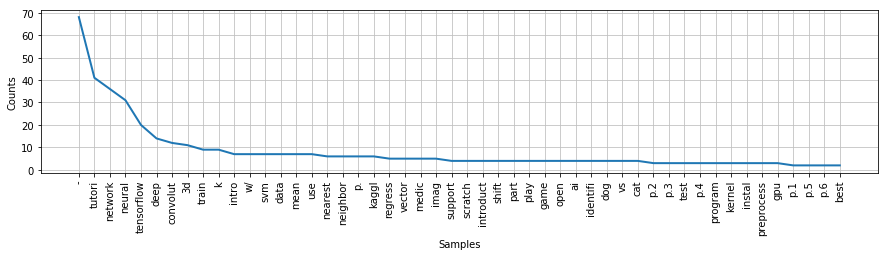

In [135]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,3
fdist.plot(50)
plt.show()

In [106]:
# all_text=""
# for j in sentences:
#     all_text=all_text + j + " "
# all_text = re.sub(r'[\.\(\-\)/\d\']', '', all_text)

In [108]:
# all_text[:2]

In [118]:
type(sentences)

list

In [121]:
## After observing the Frequency graph we find new Stop words

In [122]:
SW = SW.union(set(['with', 'p', 'learn', 'machin', 'practic', 'python']))

In [123]:
# ## Stemmed doc is appended to get the sentences
# for just frequency graph

In [124]:
processed_docs=[]

for i in stemmed_doc:
    j=word_tokenize(re.sub(r'[\.\(\-\)/\d\']', '', " ".join(i)))
    new_doc=[]
    for k in j:
        if not(k in SW):
            new_doc.append(k)
    processed_docs.append(new_doc)

In [126]:
processed_docs[:3]

[['tutori', 'intro'],
 ['regress', 'intro', 'tutori'],
 ['regress', 'featur', 'label', 'tutori']]

In [127]:
final_processed_docs = []
for i in processed_docs:
    final_processed_docs.append(' '.join(i))
final_processed_docs[:5]

['tutori intro',
 'regress intro tutori',
 'regress featur label tutori',
 'regress train test tutori',
 'regress forecast predict tutori']